Mount Google Drive into Google Colab to save pictures.

Connect to Google Drive → Login → "Select what Google Drive for Desktop can access": Select All

# Exercise 3b - Connect Google Drive & Reading .csv files

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
dir = '/content/drive/MyDrive/Colab Notebooks'
drive.mount('/content/drive')

In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/group5and6_data.csv', delimiter = ",")
print(data)

                   time   latitude   longitude  temperature   pressure  \
0   2024-05-25T15:57:02  22.378800  114.193220        23.05  100934.61   
1   2024-05-25T15:58:02  22.378769  114.193238        23.02  100935.08   
2   2024-05-25T15:59:02  22.378514  114.192996        23.60  101018.72   
3   2024-05-25T16:00:02  22.378204  114.192687        24.59  101018.91   
4   2024-05-25T16:01:02  22.378192  114.191915        25.54  101017.95   
5   2024-05-25T16:02:02  22.377776  114.191507        26.11  101016.83   
6   2024-05-25T16:03:02  22.377945  114.191129        26.59  101040.53   
7   2024-05-25T16:04:02  22.377848  114.190846        26.85  101047.06   
8   2024-05-25T16:05:02  22.377634  114.190533        27.03  101049.94   
9   2024-05-25T16:06:02  22.377417  114.190123        27.13  101045.97   
10  2024-05-25T16:07:02  22.377252  114.189699        27.26  101029.70   
11  2024-05-25T16:08:02  22.377080  114.189308        27.36  101025.24   
12  2024-05-25T16:09:02  22.376908  11

# Exercise 3c - Pandas Indexes

In [ ]:
temperature = data['temperature']
print(temperature)

In [ ]:
output = data.iloc[1]
print(output)

# Exercise 3d - Matplotlib Visualization

Let's try to plot a linear plot *first*

In [ ]:
import matplotlib.pylab as plt

x = [0,1,2,3,4]
plt.figure()
plt.plot(x,x)
plt.savefig(f"{dir}/Lecture4-Ex3d_LinearPlot.png",dpi=300)
plt.show()

Okay, we add the title and axes name for the plot now:

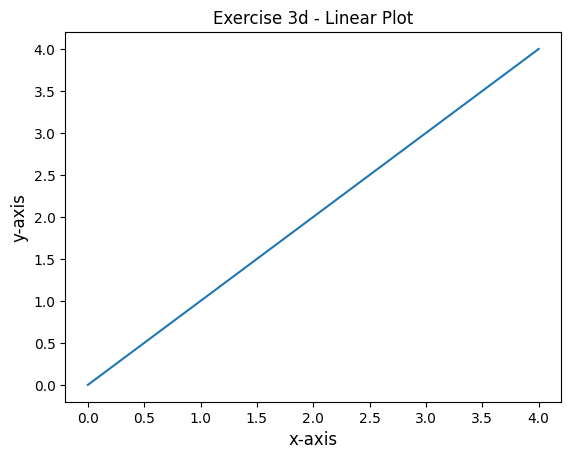

In [4]:
import matplotlib.pylab as plt

x = [0,1,2,3,4]
plt.figure()
plt.plot(x,x)

plt.title('Exercise 3d - Linear Plot', fontsize=12)
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.savefig(f"{dir}/Lecture4-Ex3d_LinearPlot(with_axis).png",dpi=300)
plt.show()

How about if we get one more dimension data (y)?

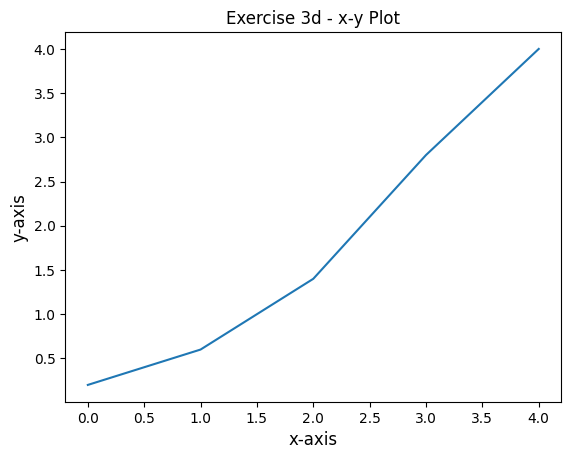

In [7]:
import matplotlib.pylab as plt

x = [0,1,2,3,4]

### Added ###
y = [0.2,0.6,1.4,2.8,4.0]
### Added ###

plt.figure()
plt.plot(x,y) #Modified

plt.title('Exercise 3d - x-y Plot', fontsize=12)
plt.xlabel('x-axis', fontsize=12)
plt.ylabel('y-axis', fontsize=12)
#plt.savefig(f"{dir}/Lecture4-Ex3d_LinearPlot(with_axis).png",dpi=300)
plt.show()

Let's plot the time series air temperature with the dataset we got from Sha Tin fieldwork on Lecture 3 :D

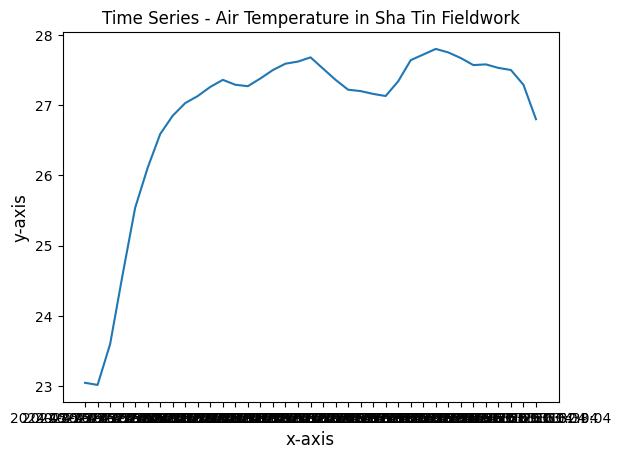

In [52]:
time = data['time']
temp = data['temperature']

plt.figure()
plt.plot(time,temp)

plt.title('Time Series - Air Temperature in Sha Tin Fieldwork', fontsize=12)
plt.xlabel('time', fontsize=12)
plt.ylabel('air temperature', fontsize=12)
#plt.savefig(f"{dir}/Lecture4-Ex3d_LinearPlot(with_axis).png",dpi=300)
plt.show()

Oops, we got some problem with the x-axis. How to make the tick marks easier to read?
We can add two lines to specify the tick frequency of data, and the orientation of axis font:


In [ ]:
time = data['time']
temp = data['temperature']

plt.figure()
plt.plot(time,temp)

plt.title('Time Series - Air Temperature in Sha Tin Fieldwork', fontsize=12)
plt.xlabel('time', fontsize=12)
plt.ylabel('air temperature', fontsize=12)

### Added ###
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(6))
plt.xticks(rotation=60)
### Added ###

plt.show()

We can also do a 2d-plot for the NASA GISTEMP v4 dataset that combines NOAA GHCN v4 (meteorological stations) and ERSST v5 (ocean areas), thus resulting into a comprehensive record of climate variability for the entire surface of our planet.

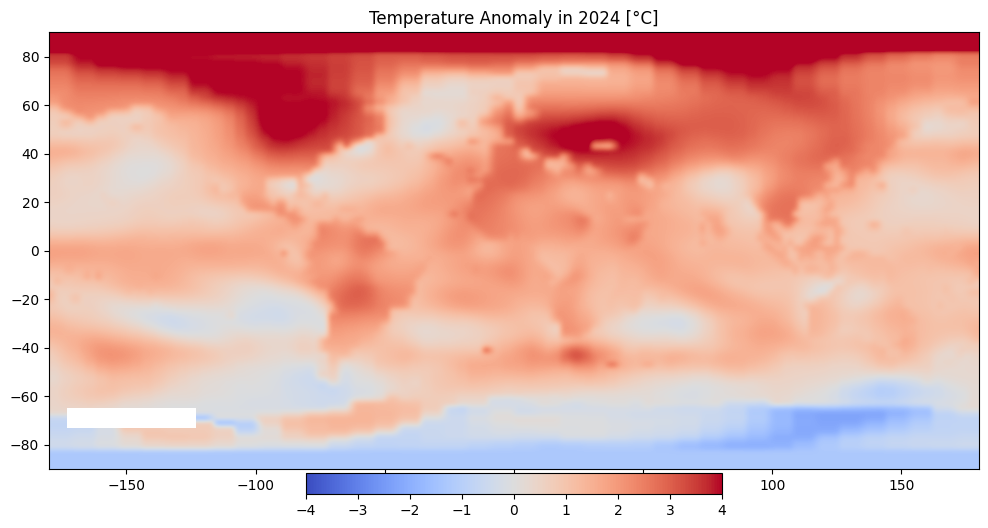

In [75]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import xarray as xr

xr_df = xr.open_dataset('/content/drive/MyDrive/Colab Notebooks/gistemp1200_GHCNv4_ERSSTv5.nc')

#Downsample the time series to yearly frequency.
climate = xr_df.resample(time='Y').mean()
anomaly = climate['tempanomaly']

#Creating a static image of the global temperature anomaly for a given year.
cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.045,
    'pad': 0.01,
    'extend':'neither'
}

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)


i=-1
date =  pd.to_datetime(anomaly.isel(time=i)['time'].values)
ax.set_title("Temperature Anomaly in "+ str(date.year) + " [°C]")
anomaly.isel(time=i).plot.imshow(ax=ax, add_labels=False, add_colorbar=True,
               vmin=-4, vmax=4, cmap='coolwarm',
               cbar_kwargs=cbar_kwargs, interpolation='bicubic')
plt.show()

# Exercise 3e - Colormap Scaling

Currently we are using cmap='coolwarm' for the colormapping, let's try another colormap



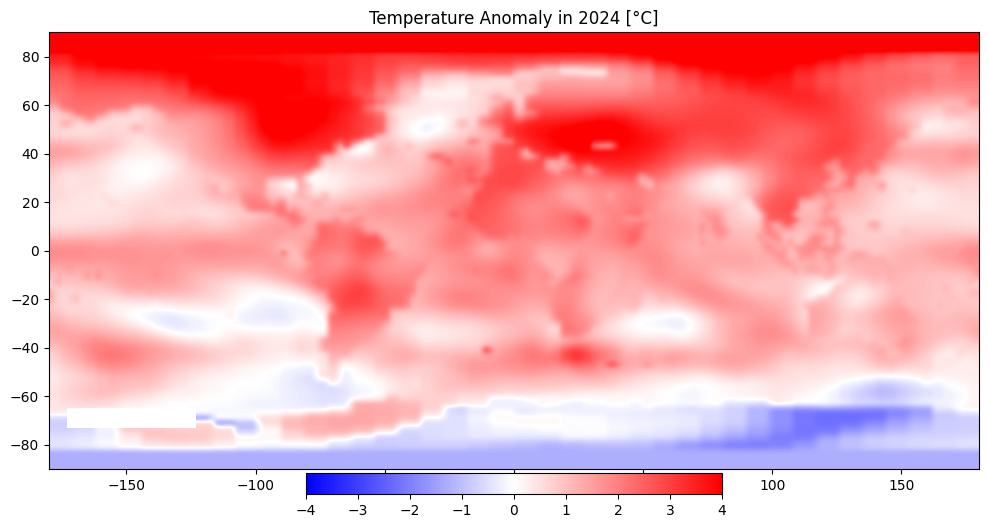

In [76]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)

i=-1
date =  pd.to_datetime(anomaly.isel(time=i)['time'].values)
ax.set_title("Temperature Anomaly in "+ str(date.year) + " [°C]")
anomaly.isel(time=i).plot.imshow(ax=ax, add_labels=False, add_colorbar=True,
               vmin=-4, vmax=4, cmap='bwr',
               cbar_kwargs=cbar_kwargs, interpolation='bicubic')
plt.show()